In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Dataset Description
#### Type: Timeseries, Multivariate

The dataset consist on the reading of 14 temperature modulated mox sensors.
Each experiment consists of 100 measurements: 10 experimental mixtures uniformly distributed in the range of 0 - 20 ppm and 10 replicates per concentration.

At the beggining of each experiment the gas chamber is cleaned by 15 mins using a stream of 240 mln/min. And after that the gas mixtures are released at 240mln/min, thus assuming the flow rate is constant.

A single experiment lasted 25 hours (100 samples x 15 minutes / sample) and was replicated on 13 working days spanning in total 17 days.


## Data Loading

In [2]:
path = "./dataset_tempMod_CO_RH"

# I get a list of the filenames for later use in a for loop.
# Then they get sorted by name and the last file which is the Readme.txt gets sliced.
files = sorted(os.listdir(path))[:-1]
files

['20160930_203718.csv',
 '20161001_231809.csv',
 '20161003_085624.csv',
 '20161004_104124.csv',
 '20161005_140846.csv',
 '20161006_182224.csv',
 '20161007_210049.csv',
 '20161008_234508.csv',
 '20161010_095046.csv',
 '20161011_113032.csv',
 '20161013_143355.csv',
 '20161014_184659.csv',
 '20161016_053656.csv']

In [3]:
# Here I load the next files skipping the first one and appending them to the main dataframe.
df_list = []

for i in files[:1]:
    try:
        ptf = path + "/" + i
        temp_df = pd.read_csv(ptf)
        df_list.append(temp_df)
        #current_df = pd.read_csv(ptf)
        #df = pd.concat([df, pd.read_csv(ptf)], axis=0)
       
        print(ptf + " " + "loaded")
    except:
        print(ptf + " not loaded")
 
df = pd.concat(df_list, axis=0)

./dataset_tempMod_CO_RH/20160930_203718.csv loaded


In [4]:
df.head(100)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),...,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
0,0.309,0.0,55.84,26.62,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.618,0.0,55.84,26.62,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.926,0.0,55.84,26.62,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.234,0.0,55.84,26.62,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.544,0.0,55.84,26.62,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29.655,0.0,55.34,26.62,240.1042,0.2000,28.0928,32.1377,42.2414,22.3331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,29.965,0.0,55.34,26.62,240.0639,0.2000,24.7804,26.4269,41.6090,22.3967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,30.274,0.0,55.34,26.62,240.0262,0.2000,21.6816,21.2859,36.4816,21.8486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,30.582,0.0,55.34,26.62,239.9997,0.2000,18.4192,16.1764,32.8215,21.5841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data structure and NA values
Now we are going to check the df memory usage and formats and the presence of NaN values in each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295718 entries, 0 to 295717
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295718 non-null  float64
 1   CO (ppm)            295718 non-null  float64
 2   Humidity (%r.h.)    295718 non-null  float64
 3   Temperature (C)     295718 non-null  float64
 4   Flow rate (mL/min)  295718 non-null  float64
 5   Heater voltage (V)  295718 non-null  float64
 6   R1 (MOhm)           295718 non-null  float64
 7   R2 (MOhm)           295718 non-null  float64
 8   R3 (MOhm)           295718 non-null  float64
 9   R4 (MOhm)           295718 non-null  float64
 10  R5 (MOhm)           295718 non-null  float64
 11  R6 (MOhm)           295718 non-null  float64
 12  R7 (MOhm)           295718 non-null  float64
 13  R8 (MOhm)           295718 non-null  float64
 14  R9 (MOhm)           295718 non-null  float64
 15  R10 (MOhm)          295718 non-nul

In [6]:
pd.set_option('display.max_rows',None)
df.isna().sum()

Time (s)                   0
CO (ppm)                   0
Humidity (%r.h.)           0
Temperature (C)            0
Flow rate (mL/min)         0
Heater voltage (V)         0
R1 (MOhm)                  0
R2 (MOhm)                  0
R3 (MOhm)                  0
R4 (MOhm)                  0
R5 (MOhm)                  0
R6 (MOhm)                  0
R7 (MOhm)                  0
R8 (MOhm)                  0
R9 (MOhm)                  0
R10 (MOhm)                 0
R11 (MOhm)                 0
R12 (MOhm)                 0
R13 (MOhm)                 0
R14 (MOhm)                 0
0.0000                295718
0.0000.1              295718
49.7534               295718
23.7184               295718
233.2737              295718
0.8993                295718
0.2231                295718
0.6365                295718
1.1493                295718
0.8483                295718
1.2534                295718
1.4449                295718
1.9906                295718
1.3303                295718
1.4480        

In [7]:
df = df.iloc[:,:20]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295718 entries, 0 to 295717
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295718 non-null  float64
 1   CO (ppm)            295718 non-null  float64
 2   Humidity (%r.h.)    295718 non-null  float64
 3   Temperature (C)     295718 non-null  float64
 4   Flow rate (mL/min)  295718 non-null  float64
 5   Heater voltage (V)  295718 non-null  float64
 6   R1 (MOhm)           295718 non-null  float64
 7   R2 (MOhm)           295718 non-null  float64
 8   R3 (MOhm)           295718 non-null  float64
 9   R4 (MOhm)           295718 non-null  float64
 10  R5 (MOhm)           295718 non-null  float64
 11  R6 (MOhm)           295718 non-null  float64
 12  R7 (MOhm)           295718 non-null  float64
 13  R8 (MOhm)           295718 non-null  float64
 14  R9 (MOhm)           295718 non-null  float64
 15  R10 (MOhm)          295718 non-nul

In [8]:
fcols = df.select_dtypes('float').columns
df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295718 entries, 0 to 295717
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295718 non-null  float32
 1   CO (ppm)            295718 non-null  float32
 2   Humidity (%r.h.)    295718 non-null  float32
 3   Temperature (C)     295718 non-null  float32
 4   Flow rate (mL/min)  295718 non-null  float32
 5   Heater voltage (V)  295718 non-null  float32
 6   R1 (MOhm)           295718 non-null  float32
 7   R2 (MOhm)           295718 non-null  float32
 8   R3 (MOhm)           295718 non-null  float32
 9   R4 (MOhm)           295718 non-null  float32
 10  R5 (MOhm)           295718 non-null  float32
 11  R6 (MOhm)           295718 non-null  float32
 12  R7 (MOhm)           295718 non-null  float32
 13  R8 (MOhm)           295718 non-null  float32
 14  R9 (MOhm)           295718 non-null  float32
 15  R10 (MOhm)          295718 non-nul

## Central  Tendencys

In [9]:
#Set option to display float format instead of scientific notation.
pd.set_option('float_format', '{:f}'.format)
df.describe()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000
mean,45457.980469,9.900820,45.966007,26.476393,239.942703,0.355291,14.962298,17.396160,22.233154,18.429729,31.054474,28.773518,31.675461,25.705853,21.295488,25.224127,27.087765,24.833601,21.742729,27.978483
std,26242.089844,6.429214,12.315907,0.211587,1.947462,0.288662,22.368208,26.648424,28.695389,15.210445,26.675747,27.238787,27.594170,18.652008,16.050901,20.224819,20.191143,18.278992,16.783501,21.642740
min,0.309000,0.000000,17.500000,26.059999,0.000000,0.199000,0.031500,0.056000,0.054000,0.040200,0.048900,0.048500,0.053400,0.033000,0.029200,0.036600,0.031000,0.032700,0.033000,0.031400
25%,22727.971680,4.440000,36.169998,26.299999,239.895798,0.200000,0.404800,0.484100,0.586300,2.068300,1.785200,1.583200,1.884150,11.291500,8.375700,7.448500,10.255300,9.384700,7.514900,9.499800
50%,45460.990234,8.890000,46.669998,26.459999,239.972900,0.200000,1.644100,1.356100,4.055400,18.579599,32.317001,22.990299,31.405399,25.808100,20.664101,23.121099,26.853300,24.903000,20.661400,26.279499
75%,68177.986328,15.560000,55.330002,26.620001,240.046204,0.207000,25.159500,28.860100,45.099400,29.209801,50.562000,49.605499,52.417400,39.041302,32.778099,39.319401,41.334400,38.116600,33.397598,43.436199
max,90909.781250,20.000000,71.959999,26.940001,275.180298,0.901000,113.486801,154.628998,182.343307,91.822601,124.194901,138.201904,151.011993,102.826500,84.987701,134.998993,108.852097,90.289398,75.413498,108.663300


From the R1 to R14 descriptions, we can appreciate a lot of skewness and outliers.

We're interested in predicting the 'CO (ppm)' variable, let's take a closer look.

In [10]:
df['CO (ppm)'].describe()

count   295718.000000
mean         9.900820
std          6.429214
min          0.000000
25%          4.440000
50%          8.890000
75%         15.560000
max         20.000000
Name: CO (ppm), dtype: float64

The 75% quartile has a value of 20, and the max value is also 20. In conclusion there are no outliers in the CO (ppm) variable.

Now the next step is visualizing the distribution of the data, as the first column is a time series it is skipped for this analysis.

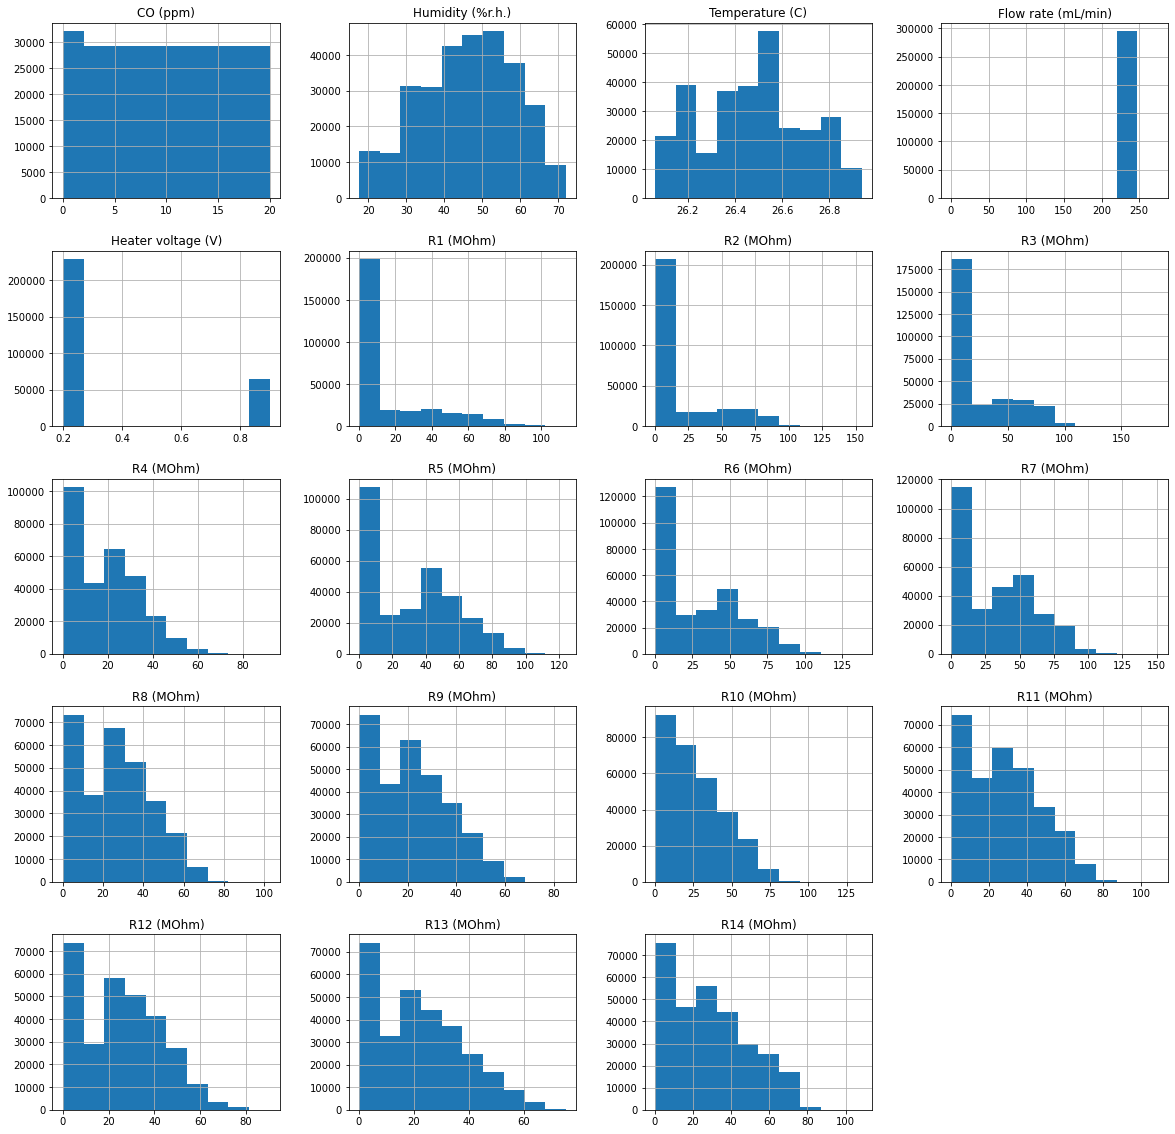

In [11]:
df.iloc[:,1:].hist(figsize=(20,20));#;

From the previous distribution charts we can see that the data tends to be left-skewed

<AxesSubplot:>

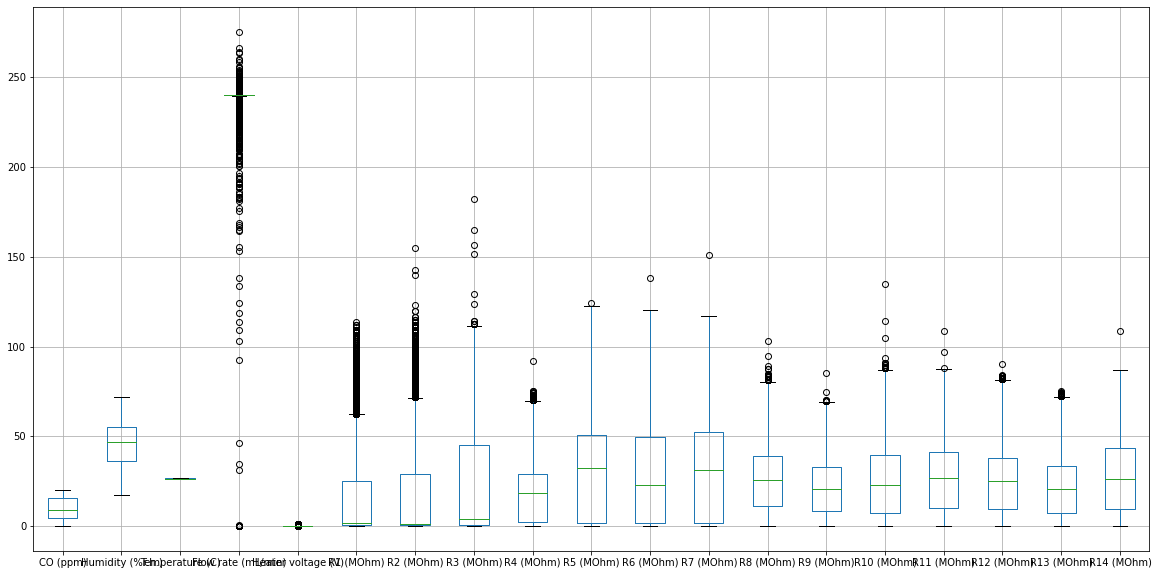

In [12]:
df.iloc[:,1:].boxplot(figsize=(20,10))

<AxesSubplot:xlabel='Time (s)'>

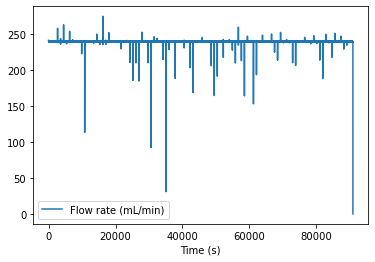

In [13]:
df.plot('Time (s)', 'Flow rate (mL/min)')

Presence of outliers in the flow rate data.

<AxesSubplot:xlabel='Time (s)'>

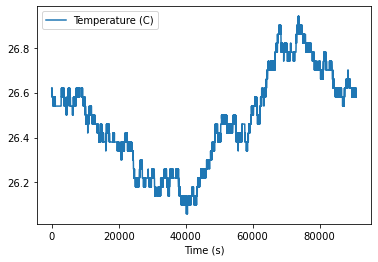

In [14]:
df.plot('Time (s)', 'Temperature (C)')

## Reading the datasets in samples.
Since each experiment consists of 15 mins of measures, and the sampling frequency of the DAQ is 3.5GHz, each 15 mins equal 3000 entries in the dataset.


In [21]:
samples = []
for i in files[:]:
    try:
        ptf = path + "/" + i
        for chunk in pd.read_csv(ptf, chunksize=3000):
            # loading only first 20 columns from chunk
            samples.append(chunk.iloc[:,:20])
            
        print(ptf + " " + "loaded")
    except:
        print(ptf + " not loaded")

./dataset_tempMod_CO_RH/20160930_203718.csv loaded
./dataset_tempMod_CO_RH/20161001_231809.csv loaded
./dataset_tempMod_CO_RH/20161003_085624.csv loaded
./dataset_tempMod_CO_RH/20161004_104124.csv loaded
./dataset_tempMod_CO_RH/20161005_140846.csv loaded
./dataset_tempMod_CO_RH/20161006_182224.csv loaded
./dataset_tempMod_CO_RH/20161007_210049.csv loaded
./dataset_tempMod_CO_RH/20161008_234508.csv loaded
./dataset_tempMod_CO_RH/20161010_095046.csv loaded
./dataset_tempMod_CO_RH/20161011_113032.csv loaded
./dataset_tempMod_CO_RH/20161013_143355.csv loaded
./dataset_tempMod_CO_RH/20161014_184659.csv loaded
./dataset_tempMod_CO_RH/20161016_053656.csv loaded


<AxesSubplot:>

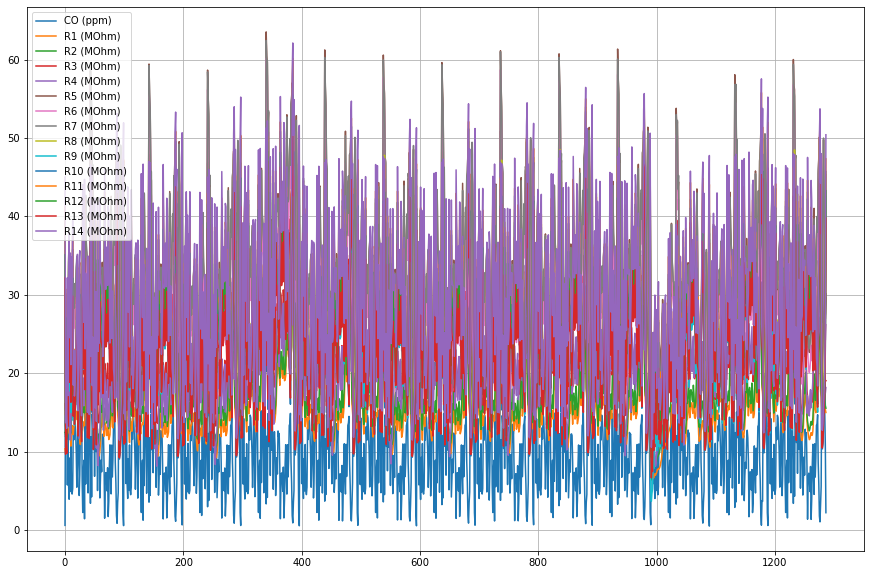

In [32]:
columns = ['CO (ppm)', 'R1 (MOhm)','R2 (MOhm)','R3 (MOhm)','R4 (MOhm)'
          ,'R5 (MOhm)','R6 (MOhm)','R7 (MOhm)','R8 (MOhm)','R9 (MOhm)'
          ,'R10 (MOhm)','R11 (MOhm)','R12 (MOhm)','R13 (MOhm)','R14 (MOhm)']
means = []
for datasets in samples:
    temp = datasets[columns].mean()
    means.append(temp)
mean_df = pd.DataFrame(data=means)
mean_df.plot(figsize=(15,10), grid=True)

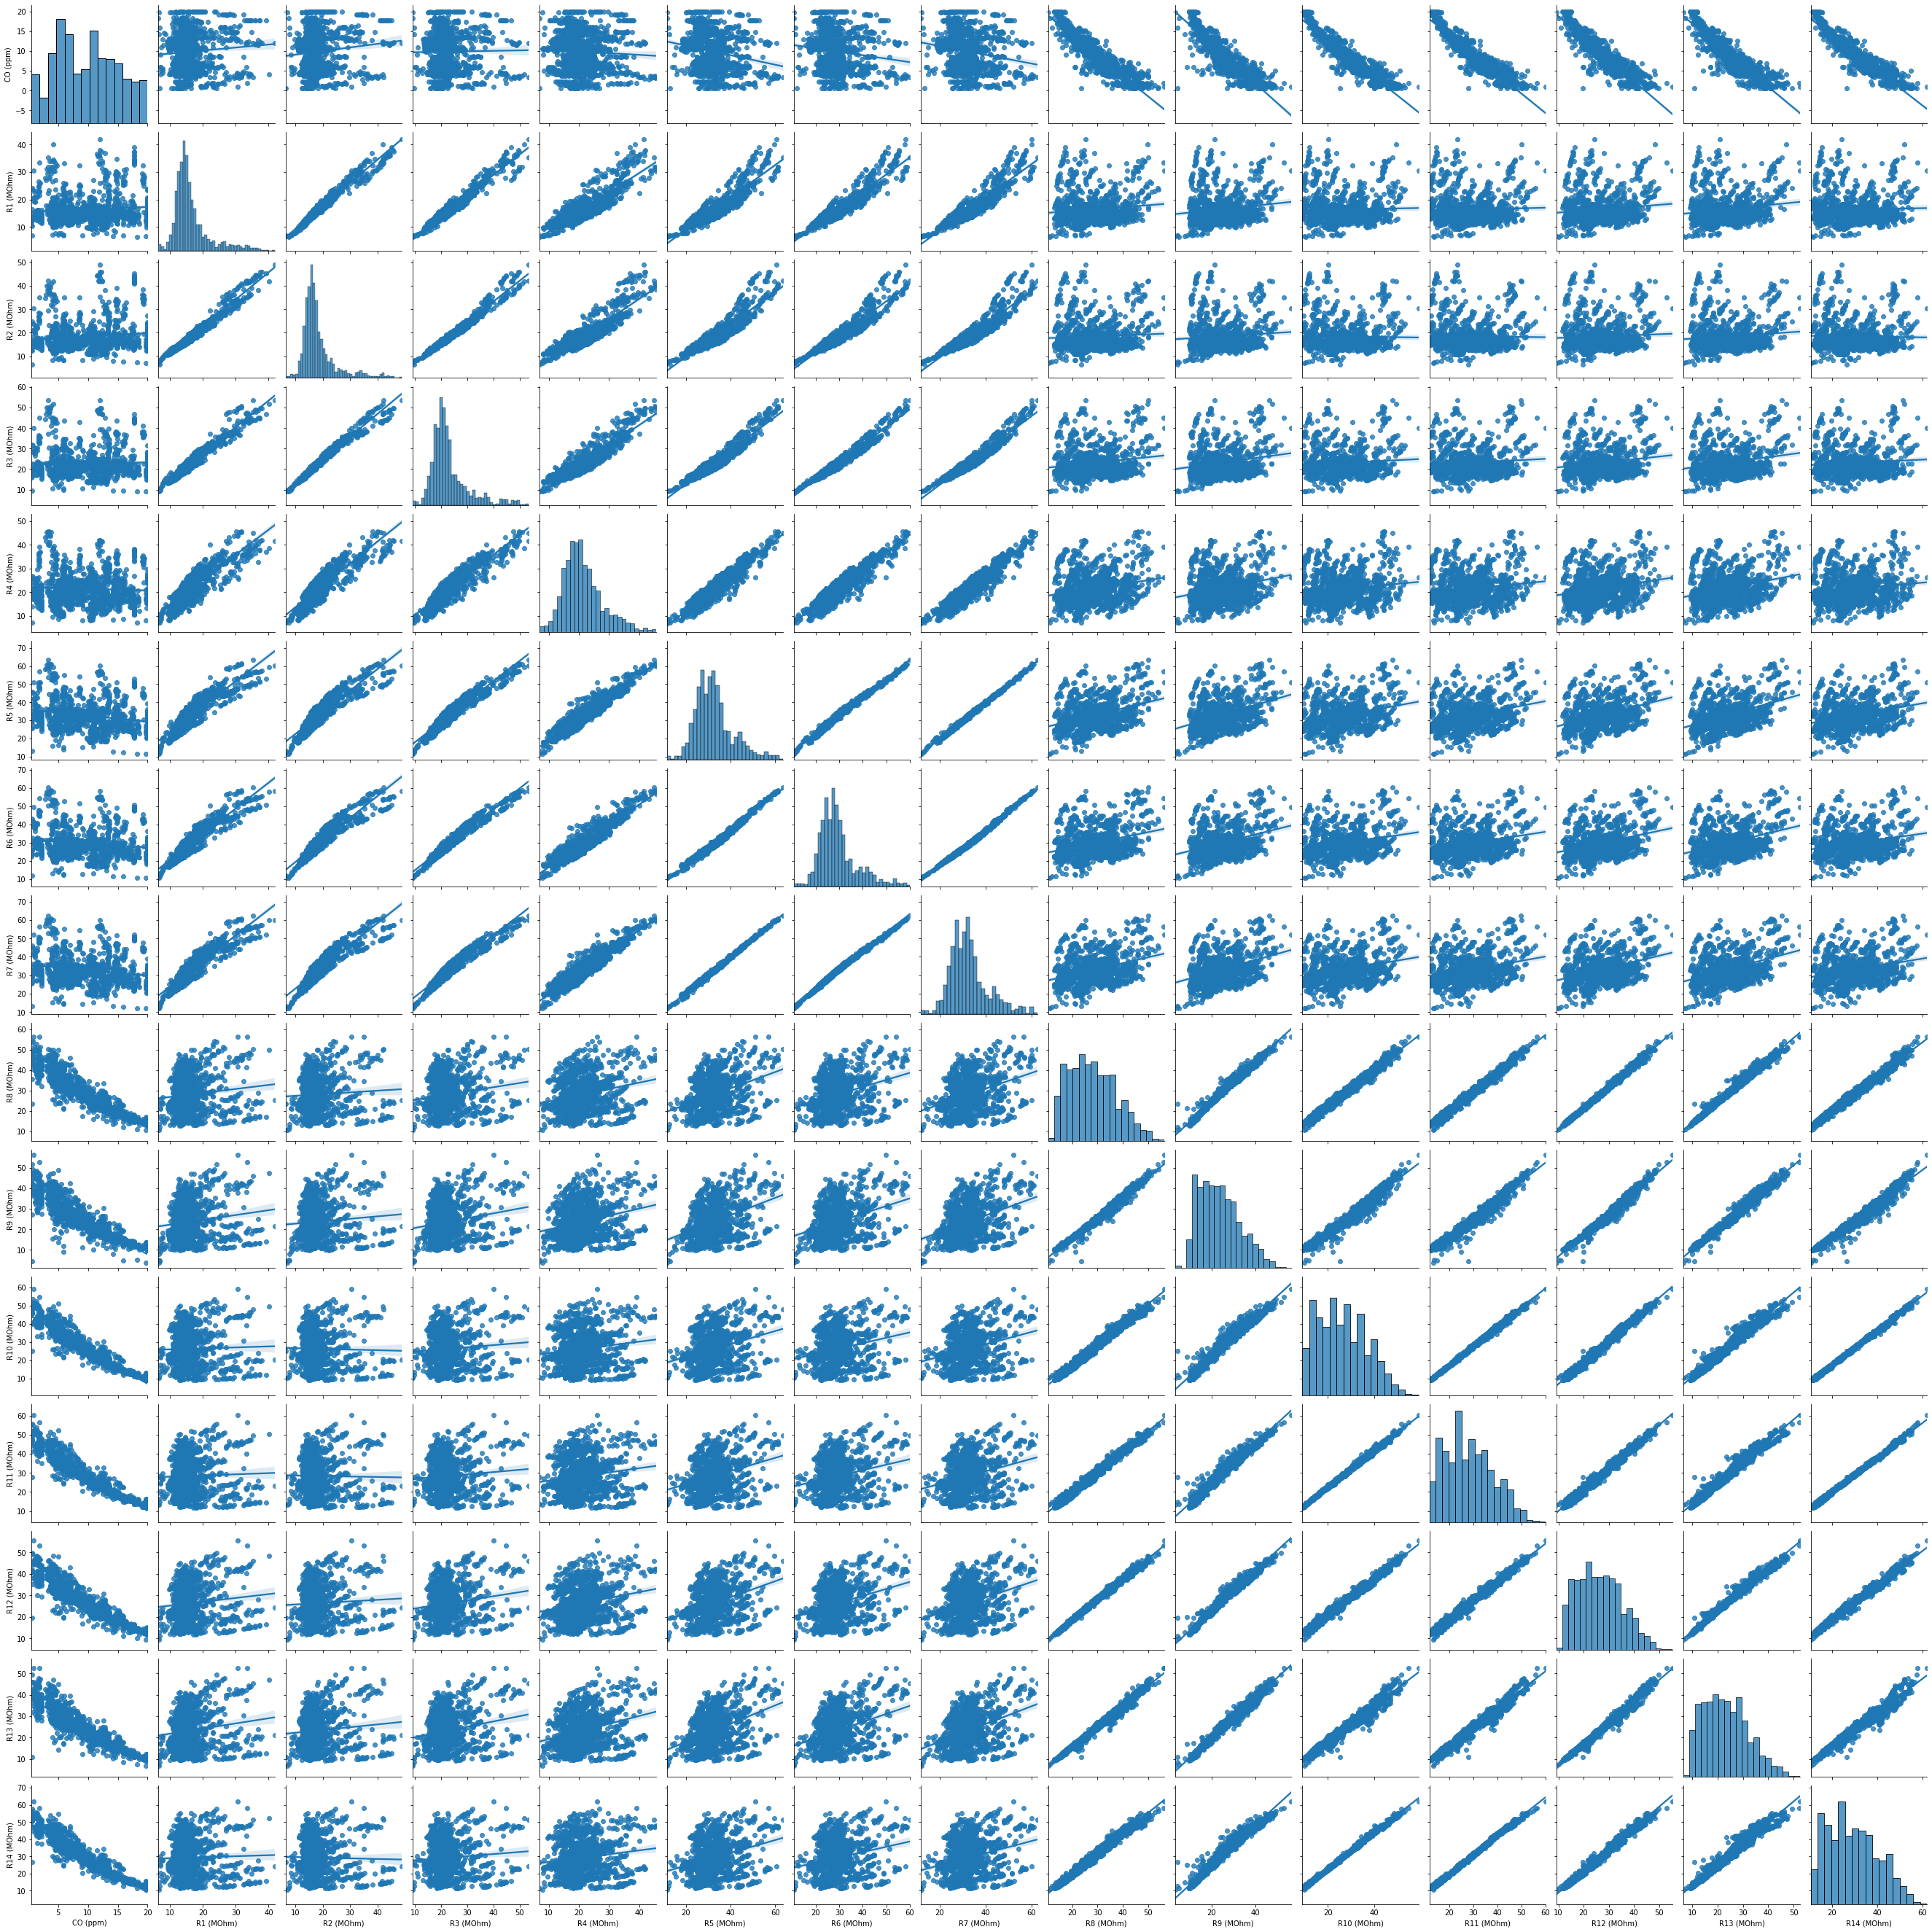

In [27]:
#g=sns.pairplot(mean_df, y_vars=['CO (ppm)'], kind='reg')
g=sns.pairplot(mean_df, kind='reg')
#g.fig.set_size_inches(30,4)

Plotting only variables 'CO (ppm)' vs 'R8-14 (MOhm)'.


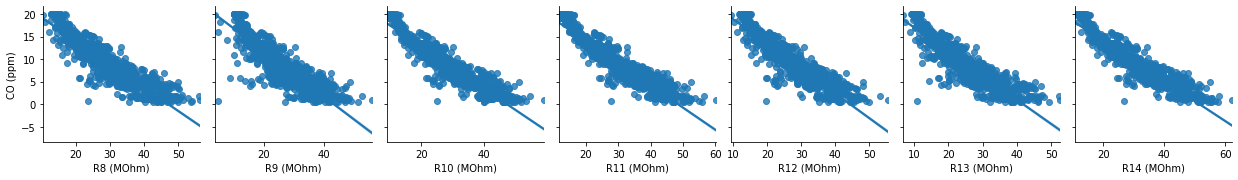

In [30]:
sns.pairplot(mean_df, y_vars=['CO (ppm)'], x_vars=['R8 (MOhm)','R9 (MOhm)'
          ,'R10 (MOhm)','R11 (MOhm)','R12 (MOhm)','R13 (MOhm)','R14 (MOhm)'],
             kind='reg')

## Conclusion

By looking at the last plot, we can see a linear relationship between the R8-R14 sensors and the PPM of CO.

## Data Pre-processing.

And the boxplot chart shows that there's presence of outliers in the sensor readings.

In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer